In [1]:
import pandas as pd
pd.options.display.max_columns = 100

In [2]:
all_muts_df = pd.read_pickle("./data/4_df.pkl")
all_muts_df.shape

(3166, 43)

In [3]:
exp_mut_feat_df = pd.DataFrame()
for _, mut in all_muts_df.iterrows():
    for feat in mut["genomic features"]:
        exp_mut_feat_df = exp_mut_feat_df.append(
            {
                'mutated feature': feat['name'],
                "experiment": mut["exp"],
                "associated condition set": feat["significantly associated conditions"]
            },
            ignore_index=True)
exp_mut_feat_df.head()

,associated condition set,experiment,mutated feature
0,{},42C,clsA
1,"{511145, M9, glucose(4)}",42C,rph-pyrE attenuator terminator
2,"{511145, M9, glucose(4)}",42C,rph
3,{},42C,rpoC
4,{},42C,hfq


In [4]:
display(
    (len(exp_mut_feat_df) - len(exp_mut_feat_df[exp_mut_feat_df["associated condition set"]==set()])) / len(exp_mut_feat_df),
)

0.25600208768267224

In [5]:
all_exp_mut_feat_assoc_prop = pd.DataFrame()
for exp, df in exp_mut_feat_df.groupby(["experiment"]):
    prop = (len(df) - len(df[df["associated condition set"]==set()])) / len(df)
    all_exp_mut_feat_assoc_prop = all_exp_mut_feat_assoc_prop.append(
        {"experiment": exp, "proportion": prop},
        ignore_index=True
    )
all_exp_mut_feat_assoc_prop

,experiment,proportion
0,42C,0.353191
1,C13,0.615385
2,Central_carbon_knockout_PTS,0.707317
3,Central_carbon_knockout_glucose_evolution,0.866667
4,Central_carbon_knockout_gnd,0.724138
5,Central_carbon_knockout_pgi,0.468619
6,Central_carbon_knockout_sdh,0.884615
7,Central_carbon_knockout_tpiA,0.840000
8,EEP_menF_entC,0.658537
9,GLU,0.026667


(0, 1)

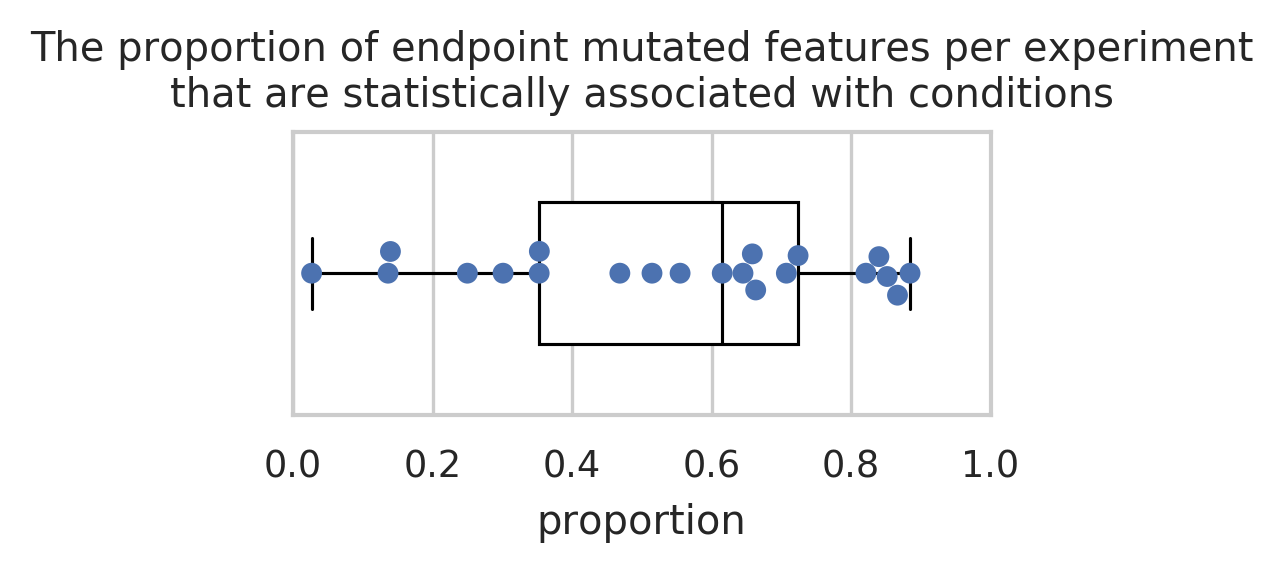

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("deep")


boxplot_kwargs = {
    'boxprops': {'edgecolor': 'k', 'linewidth': 0.75},
    'whiskerprops': {'color': 'k', 'linewidth': 0.75},
    'medianprops': {'color': 'k', 'linewidth': 0.75},
    'capprops': {'color': 'k', 'linewidth': 0.75},
    'flierprops': {'marker': '.', 'markerfacecolor': 'black', 'markeredgecolor': None}
}

plt.figure(figsize=(3,1.25))
ax = sns.boxplot(data=all_exp_mut_feat_assoc_prop,
                 x="proportion",
                 width=0.5,
                 color="white",
                 **boxplot_kwargs)
ax = sns.swarmplot(data=all_exp_mut_feat_assoc_prop,
                 x="proportion")

# ax.set_title("The distribution of mutations\nwith statistically associated conditions\nper experiment")
ax.set_title("The proportion of endpoint mutated features per experiment\nthat are statistically associated with conditions")
# ax.yaxis.label.set_visible(False)
# ax.set_xlabel("The proportion of mutated features per experiment\nthat are statistically associated with conditions")
plt.xlim(0, 1)

In [7]:
# The data I have here is for unique endpoint mutations and not all of ALEdb.
#These are the mutations that most likely represent actual adaptive changes and are therefore most valubale.
# exp_mut_feat_df.head()
display(len(exp_mut_feat_df[exp_mut_feat_df["associated condition set"]!=set()]))
len(exp_mut_feat_df[exp_mut_feat_df["associated condition set"]!=set()])/len(exp_mut_feat_df)

981

0.25600208768267224

In [8]:
cond_mut_feat_df = exp_mut_feat_df.drop(columns=["experiment", "mutated feature"])
cond_mut_feat_df["associated condition set"] = cond_mut_feat_df["associated condition set"].apply(str)
cond_mut_feat_df.head()

,associated condition set
0,set()
1,"{'511145', 'M9', 'glucose(4)'}"
2,"{'511145', 'M9', 'glucose(4)'}"
3,set()
4,set()


In [9]:
stacked_bar_df = pd.DataFrame()
for cond_set, df in cond_mut_feat_df.groupby(["associated condition set"]):
    d = {
        "associated condition set": cond_set,
        "database mutation proportion": len(df)/len(cond_mut_feat_df)
    }
    stacked_bar_df = stacked_bar_df.append(d, ignore_index=True)
stacked_bar_df = stacked_bar_df.sort_values(by="database mutation proportion", ascending=False)
stacked_bar_df.head()

,associated condition set,database mutation proportion
0,set(),0.743998
23,"{'REL606', 'DM', '413997', 'glucose(0.025)'}",0.057933
34,{'glycerol(2.5)'},0.018528
6,"{'511145', 'M9'}",0.015919
37,"{'Δpgi', 'MgSO4(3)', 'KH2PO4(2)', 'M9', 'gluco...",0.015136


In [10]:
stacked_bar_df = stacked_bar_df.set_index('associated condition set')
stacked_bar_df.head()

,database mutation proportion
associated condition set,
set(),0.743998
"{'REL606', 'DM', '413997', 'glucose(0.025)'}",0.057933
{'glycerol(2.5)'},0.018528
"{'511145', 'M9'}",0.015919
"{'Δpgi', 'MgSO4(3)', 'KH2PO4(2)', 'M9', 'glucose(4)', '511145'}",0.015136


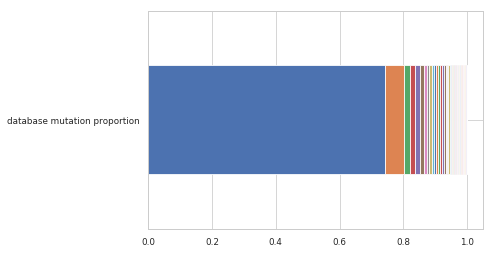

In [11]:
ax = stacked_bar_df.T.plot.barh(stacked=True)
ax.legend().set_visible(False)

In [12]:
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],'radius': [2439.7, 6051.8, 6378.1]}, index=['Mercury', 'Venus', 'Earth'])
df

,mass,radius
Mercury,0.33,2439.7
Venus,4.87,6051.8
Earth,5.97,6378.1


Text(0.5, 1.0, 'Proportion of mutated features\nstatistically associated with conditions')

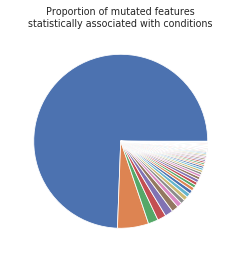

In [13]:
l = [''] * len(stacked_bar_df)
ax = stacked_bar_df.plot.pie(y="database mutation proportion",
                             labels=l,
                             legend=False)
ax.set_ylabel('')
ax.set_title("Proportion of mutated features\nstatistically associated with conditions")